## ch8_4 pandas AI

지금까지 pandas를 이용하여 데이터프레임에서 데이터를 읽어오고, 원하는 데이터들을 조회해봤습니다. 그런데 이 작업을 굳이 숙련된 개발자가 해야만할까요? 데이터를 잘 모르더라도, pandas를 잘 모르더라도 쉽게 말로 하면 편하지 않을까요? 이런 아이디어에서 출발한 것이 pandas AI입니다. 직접 사용해보면서 데이터 분석 작업이 얼마나 편해지는 지를 체감해보겠습니다.

https://github.com/gventuri/pandas-ai

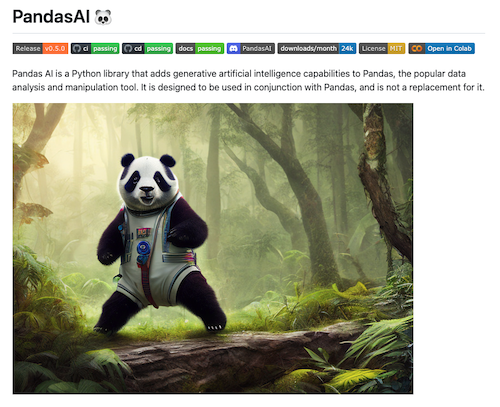

In [1]:
!pip install pandasai

In [2]:
import pandasai

pandasAI를 이용하기 위해서는 사전에 chatGPT API key를 발급받아야 합니다. openAI console에서 토큰을 만들어주세요. 생성한 토큰은 코드에 직접 입력하지 말고, 아래 가이드를 따라서 로컬 컴퓨터에 환경변수로 등록 한 뒤, 사용하시기 바랍니다.

- windows 환경변수 등록:
- mac 환경변수 등록: https://life-of-panda.tistory.com/41

In [3]:
import os

openai_token = os.environ.get("OPENAI_TOKEN")
if not openai_token:
    raise ValueError("openai token not found in local environment variables!")

In [4]:
import pandas as pd

df = pd.read_csv("./data/spotify_2019.csv")

In [5]:
df

,Country,Rank,Track_id,Streams,Track Name,Artist,URL,acousticness,danceability,energy,...,valence,tempo,time_signature,duration_ms,key,mode,Artist_id,Artist_popularity,Artist_follower,Artist_img
0,global,1.0,25sgk305KZfyuqVBQIahim,1166185736,Sweet but Psycho,Ava Max,https://open.spotify.com/track/25sgk305KZfyuqV...,0.0691,0.719,0.704,...,0.628,133.002,4,187436,1,1,4npEfmQ6YuiwW1GpUmaq3F,87,1025358,https://i.scdn.co/image/4b914c6470c8458674538a...
1,global,2.0,2Fxmhks0bxGSBdJ92vM42m,1052358787,bad guy,Billie Eilish,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...,0.3280,0.701,0.425,...,0.562,135.128,4,194088,7,1,6qqNVTkY8uBg9cP3Jd7DAH,98,18867904,https://i.scdn.co/image/2622edec99d68d1d141886...
2,global,3.0,6ocbgoVGwYJhOv1GgI9NsF,789094044,7 rings,Ariana Grande,https://open.spotify.com/track/6ocbgoVGwYJhOv1...,0.5920,0.778,0.317,...,0.327,140.048,4,178627,1,0,66CXWjxzNUsdJxJ2JdwvnR,97,40958727,https://i.scdn.co/image/b1dfbe843b0b9f54ab2e58...
3,global,4.0,1rgnBhdG2JDFTbYkYRZAku,764208309,Dance Monkey,Tones and I,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,0.6880,0.825,0.593,...,0.540,98.078,4,209755,6,0,2NjfBq1NflQcKSeiDooVjY,92,484241,https://i.scdn.co/image/c128f5ef4d210a67610acd...
4,global,5.0,6v3KW9xbzN5yKLt9YKDYA2,763064359,Señorita,Shawn Mendes,https://open.spotify.com/track/6v3KW9xbzN5yKLt...,0.0392,0.759,0.548,...,0.749,116.967,4,190800,9,0,7n2wHs1TKAczGzO7Dd2rGr,94,23152263,https://i.scdn.co/image/6bd59cfbd3e1e6394af710...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,global,1713.0,27SdWb2rFzO6GWiYDBTD9j,554971,Cheap Thrills,Sia,https://open.spotify.com/track/27SdWb2rFzO6GWi...,0.0472,0.628,0.698,...,0.732,89.976,4,211667,6,0,5WUlDfRSoLAfcVSX1WnrxN,90,15317280,https://i.scdn.co/image/652b6bb0dfaf8aa444f441...
1713,global,1714.0,0kLA41xkWzzYzMIEGFuDkP,544655,HaifischNikez Allstars,LX,https://open.spotify.com/track/0kLA41xkWzzYzMI...,0.1620,0.764,0.744,...,0.507,87.538,4,182925,11,0,10XY9PZCJKzUFzZOdtlQLU,71,64625,https://i.scdn.co/image/60d0c075d6de8417a0c44d...
1714,global,1715.0,79hJaqmVdohltPBNN6BULM,536886,"Stayin' Alive - From ""Saturday Night Fever"" So...",Bee Gees,https://open.spotify.com/track/79hJaqmVdohltPB...,0.0700,0.708,0.567,...,0.955,103.606,4,281667,10,0,1LZEQNv7sE11VDY3SdxQeN,79,2834719,https://i.scdn.co/image/1d5a05673975ba0c378cd2...
1715,global,1716.0,7rLegaz7zKB6EtDNzcslKE,536447,Medley da Gaiola - Dennis DJ Remix,MC Kevin o Chris,https://open.spotify.com/track/7rLegaz7zKB6EtD...,0.7110,0.896,0.756,...,0.686,140.076,4,240000,4,0,2UMj7NCbuqy1yUZmiSYGjJ,84,1139072,https://i.scdn.co/image/984dfbcdcf7880b022478b...


### pandas ai를 이용해 데이터 분석하기

pandas ai를 이용하면 자연어로 데이터 분석을 수행할 수 있습니다. 

In [6]:
from pandasai.llm.openai import OpenAI
from pandasai import PandasAI

llm = OpenAI(api_token=openai_token)
pandas_ai = PandasAI(llm)

In [7]:
pandas_ai(df, prompt="Which are the 10 popular tracks?")

0     Sweet but Psycho
1              bad guy
2              7 rings
3         Dance Monkey
4             Señorita
5            Con Calma
6              Shallow
7    Someone You Loved
8              Happier
9                 Wow.
Name: Track Name, dtype: object

In [8]:
pandas_ai(df, prompt="How many tracks of BTS are included?")

11

pandas_ai(df, prompt="Can you show me all the BTS tracks?")

In [9]:
pandas_ai(df, prompt="BTS 트랙들의 평균 스트리밍 횟수를 계산해줘")

38172837.09090909

In [10]:
pandas_ai(df, prompt="Can you get average streaming count per artist?")

Artist
*NSYNC                 7.447183e+06
2 Chainz               3.510584e+06
21 Savage              6.787244e+07
24kGoldn               3.143241e+07
5 Seconds of Summer    9.526804e+07
                           ...     
blackbear              2.809155e+08
blink-182              6.964560e+05
j-hope                 4.184306e+06
tha Supreme            3.493048e+06
Şanışer                1.500424e+06
Name: Streams, Length: 488, dtype: float64

### pandas ai로 plot 그리기
자연어로 요청을 하여 그래프를 그릴 수도 있습니다. 

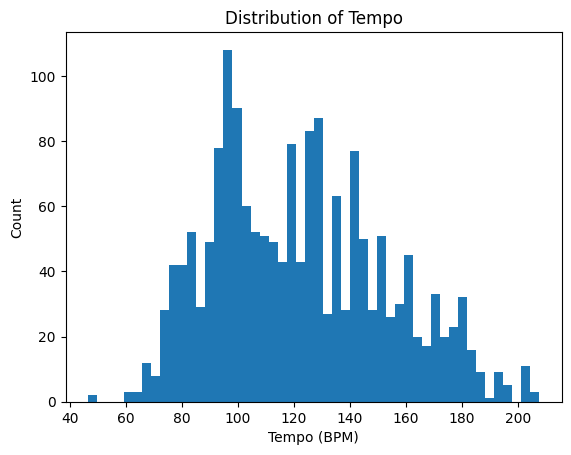

In [11]:
pandas_ai(df, "Plot distribution of tempo")

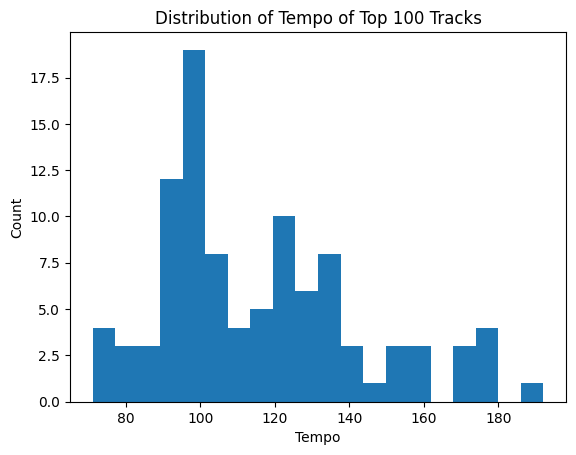

In [12]:
pandas_ai(df, "Plot distribution of tempo of top 100 tracks")

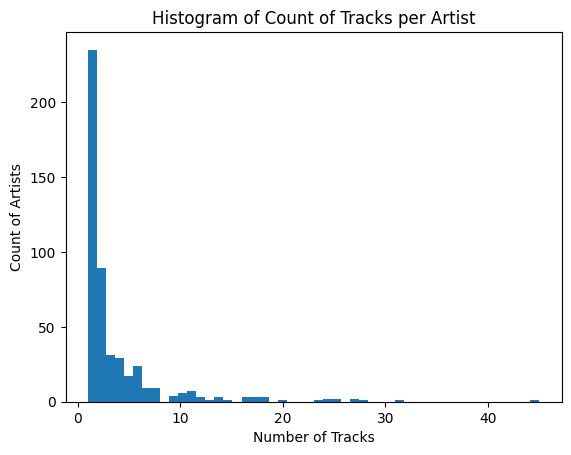

In [13]:
pandas_ai(df, "Plot histogram of count of tracks per artist")

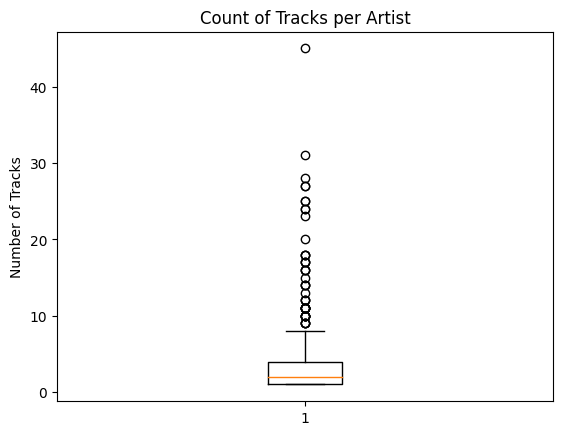

In [14]:
pandas_ai(df, "Plot boxplot of count of tracks per artist")

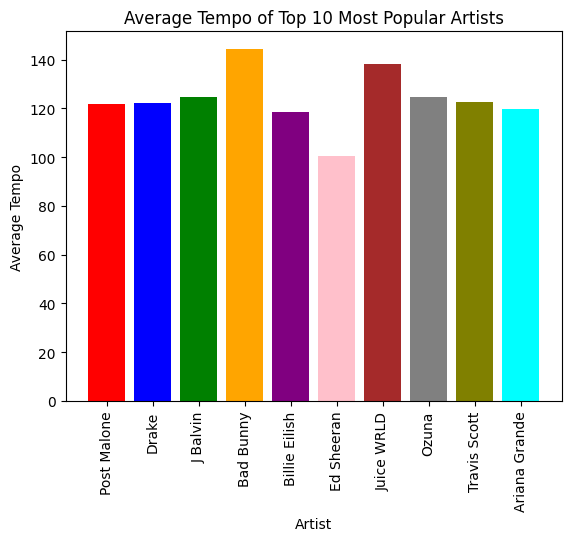

In [15]:
pandas_ai(df, "Plot average tempo of top 10 most popular artists, using different colors for each bar, x_ticks rotation 90")

## 정리
이번 챕터에서는 LLM을 이용해서 데이터 프레임 형태의 데이터를 손쉽게 분석하는 방법에 대해서 알아보았습니다. 아직은 간단한 데이터 처리와 시각화 밖에 지원하지 않지만, LLM이 계속 발전할 경우 활용도가 무궁무진할 것 같습니다. LLM에 의존하는 것은 지양해야하지만, 적극적으로 최신 트렌드를 익히고 많이 사용해보는 것은 충분히 의미가 있으니, 다양한 방면으로 한번 사용해보시길 권합니다.